# Make Plots for evaluating NN output

In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
@author: marcodia
"""
import numpy as np
import random
import xarray as xr
import pandas as pd
import datetime as dt
import time
import matplotlib.pyplot as plt
import matplotlib as mpl

import seaborn as sns
import keras
import math

from sklearn import preprocessing
import tensorflow as tf

import import_ipynb
import sys
import os 

import network_arch as network
import metrics
import plot as plot
import settings
import functions_misc as fnc


from cartopy import config
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point

import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from shapely.geometry.polygon import LinearRing

import pop_tools


2024-01-11 13:49:09.978287: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


importing Jupyter notebook from network_arch.ipynb
importing Jupyter notebook from metrics.ipynb
importing Jupyter notebook from plot.ipynb
importing Jupyter notebook from settings.ipynb
importing Jupyter notebook from functions_misc.ipynb


In [2]:
ddir_X = '/Users/marcodia/Research/salinity_s2s/experiments/no_arctic/evaluations/'
num_ens = 5
lead_week = 9
file_readin = xr.open_dataarray(ddir_X+'XAI_gradients_pred0_true0_expl1_0wklead_testens0.nc')
X_nplat = np.array(file_readin.lat)
X_nplon = np.array(file_readin.lon)

XAI_0_leadall = xr.DataArray(np.zeros((lead_week,num_ens,file_readin.shape[1],file_readin.shape[2])),
                             dims = ['lead','ens','lat','lon'],
                             coords = [('lead',np.arange(0,lead_week)),('ens',np.arange(0,num_ens)),('lat',X_nplat),('lon',X_nplon)])

XAI_1_leadall = xr.DataArray(np.zeros((lead_week,num_ens,file_readin.shape[1],file_readin.shape[2])),
                             dims = ['lead','ens','lat','lon'],
                             coords = [('lead',np.arange(0,lead_week)),('ens',np.arange(0,num_ens)),('lat',X_nplat),('lon',X_nplon)])


In [3]:
count_num_0 = np.zeros((lead_week,1)) 
count_num_1 = np.zeros((lead_week,1)) 

for w in np.arange(0,lead_week):    
#for w in np.arange(3,4):    
    count_0 = 0 
    count_1 = 0
    for i in np.arange(0,5):
        X_finame = 'XAI_gradients_pred0_true0_expl1_'+str(w)+'wklead_testens'+str(i)+'.nc'
        XAI_0_single = xr.open_dataarray(ddir_X+X_finame)
        count0 = len(XAI_0_single.time)
        count_0 = count_0 + count0
        XAI_0_timemean = np.mean(XAI_0_single,axis=0)
        XAI_0_leadall[w,i,:,:] = XAI_0_timemean
        
        X_finame1 = 'XAI_gradients_pred1_true1_expl1_'+str(w)+'wklead_testens'+str(i)+'.nc'
        XAI_1_single = xr.open_dataarray(ddir_X+X_finame1)
        count1 = len(XAI_1_single.time)
        count_1 = count_1 + count1
        XAI_1_timemean = np.mean(XAI_1_single,axis=0)
        XAI_1_leadall[w,i,:,:] = XAI_1_timemean
    if i == 4:
        count_num_0[w,:] = count_0
        count_num_1[w,:] = count_1

In [4]:
count_num_1

array([[1700.],
       [1680.],
       [1665.],
       [1873.],
       [1963.],
       [1823.],
       [2813.],
       [2316.],
       [1658.]])

In [5]:
XAI_0_comp_leadall = np.mean(XAI_0_leadall,axis=1)
XAI_1_comp_leadall = np.mean(XAI_1_leadall,axis=1)


XAI_0_comp_lead0 = XAI_0_comp_leadall[0,:,:]
XAI_0_comp_lead1 = XAI_0_comp_leadall[1,:,:]
XAI_0_comp_lead2 = XAI_0_comp_leadall[2,:,:]
XAI_0_comp_lead3 = XAI_0_comp_leadall[3,:,:]
XAI_0_comp_lead4 = XAI_0_comp_leadall[4,:,:]
XAI_0_comp_lead5 = XAI_0_comp_leadall[5,:,:]
XAI_0_comp_lead6 = XAI_0_comp_leadall[6,:,:]
XAI_0_comp_lead7 = XAI_0_comp_leadall[7,:,:]
XAI_0_comp_lead8 = XAI_0_comp_leadall[8,:,:]

XAI_1_comp_lead0 = XAI_1_comp_leadall[0,:,:]
XAI_1_comp_lead1 = XAI_1_comp_leadall[1,:,:]
XAI_1_comp_lead2 = XAI_1_comp_leadall[2,:,:]
XAI_1_comp_lead3 = XAI_1_comp_leadall[3,:,:]
XAI_1_comp_lead4 = XAI_1_comp_leadall[4,:,:]
XAI_1_comp_lead5 = XAI_1_comp_leadall[5,:,:]
XAI_1_comp_lead6 = XAI_1_comp_leadall[6,:,:]
XAI_1_comp_lead7 = XAI_1_comp_leadall[7,:,:]
XAI_1_comp_lead8 = XAI_1_comp_leadall[8,:,:]

In [6]:
ddir_out = '/Users/marcodia/Research/salinity_s2s/experiments/no_arctic/evaluations/'

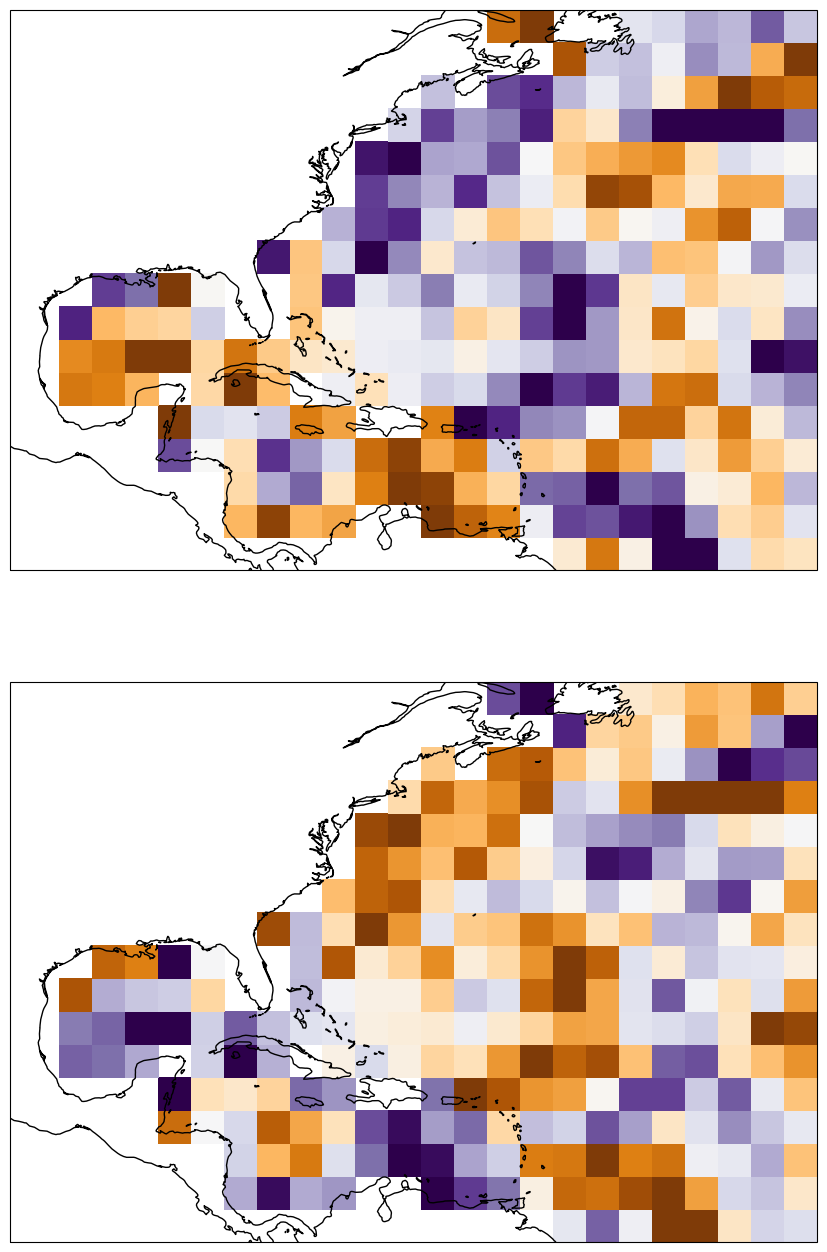

In [9]:
linewidth_default = 2.0
fig_text_default = 18.
fig_title_default = fig_text_default*1.5

plt.rc('lines', linewidth=linewidth_default)    
plt.rc('text', usetex=False)
plt.rc('font', size=fig_text_default, weight='normal',family='sans-serif')
plt.rc('axes',titlesize=fig_title_default,titleweight='bold')
mpl.rcParams['figure.dpi'] = 100

min_level = -0.003 
max_level = 0.003 
step_level = 0.0001
levels = np.arange(min_level,max_level,step_level)
cmap = 'PuOr'
extent = [np.min(XAI_0_comp_leadall.lon)-5, np.max(XAI_0_comp_leadall.lon)+1.25, np.min(XAI_0_comp_leadall.lat)-1.25, np.max(XAI_0_comp_leadall.lat)+1.25]

#fig, ((ax00, ax01), (ax10, ax11)) = plt.subplots(nrows=2,ncols=lead_week, figsize=(14, 8), subplot_kw={"projection": ccrs.PlateCarree(central_longitude=200)})
fig, ((ax03), (ax13)) = plt.subplots(nrows=2,ncols=1, figsize=(30, 16), subplot_kw={"projection": ccrs.PlateCarree(central_longitude=200)})

#Light Week 3
#ax03.set_title('Light Lead Week 3', fontsize = '16', fontweight = 'light') #n='+str(count_1)
#ax03.set_title('Light Precip Prediction XAI    n='+str(int(count_num_0[3])), fontsize = '26', fontweight = 'light') #n='+str(count_1)

XAI_0_comp_lead3, cyclic_lons = add_cyclic_point(XAI_0_comp_lead3, coord=XAI_0_comp_leadall.lon)
cf3 = ax03.pcolor(cyclic_lons,XAI_0_comp_leadall.lat, XAI_0_comp_lead3, transform = ccrs.PlateCarree(), cmap =cmap,vmin = min_level, vmax=max_level)
ax03.add_feature(cfeature.COASTLINE)
ax03.set_extent(extent,crs=ccrs.PlateCarree())


#Heavy Week 3
#ax13.set_title('Heavy Lead Week 3', fontsize = '16', fontweight = 'light') #n='+str(count_1)
#ax13.set_title('Heavy Precip Prediction XAI    n='+str(int(count_num_1[3])), fontsize = '26', fontweight = 'light') #n='+str(count_1)

XAI_1_comp_lead3, cyclic_lons = add_cyclic_point(XAI_1_comp_lead3, coord=XAI_1_comp_leadall.lon)
cf8 = ax13.pcolor(cyclic_lons,XAI_1_comp_leadall.lat, XAI_1_comp_lead3, transform = ccrs.PlateCarree(), cmap =cmap,vmin = min_level, vmax=max_level)
ax13.add_feature(cfeature.COASTLINE)
ax13.set_extent(extent,crs=ccrs.PlateCarree())


plt.subplots_adjust(wspace=0.1, hspace=.2)
#fig.colorbar(cf9,ax=ax14, pad=10)

#plt.savefig('/Users/marcodia/Research/salinity_s2s/Scripts/figs/XAI_Foos_lead0-5.png', dpi=150)
plt.show()

# #plt.savefig(ddir_out+'XAI_lead21.png', format='png',dpi=150)

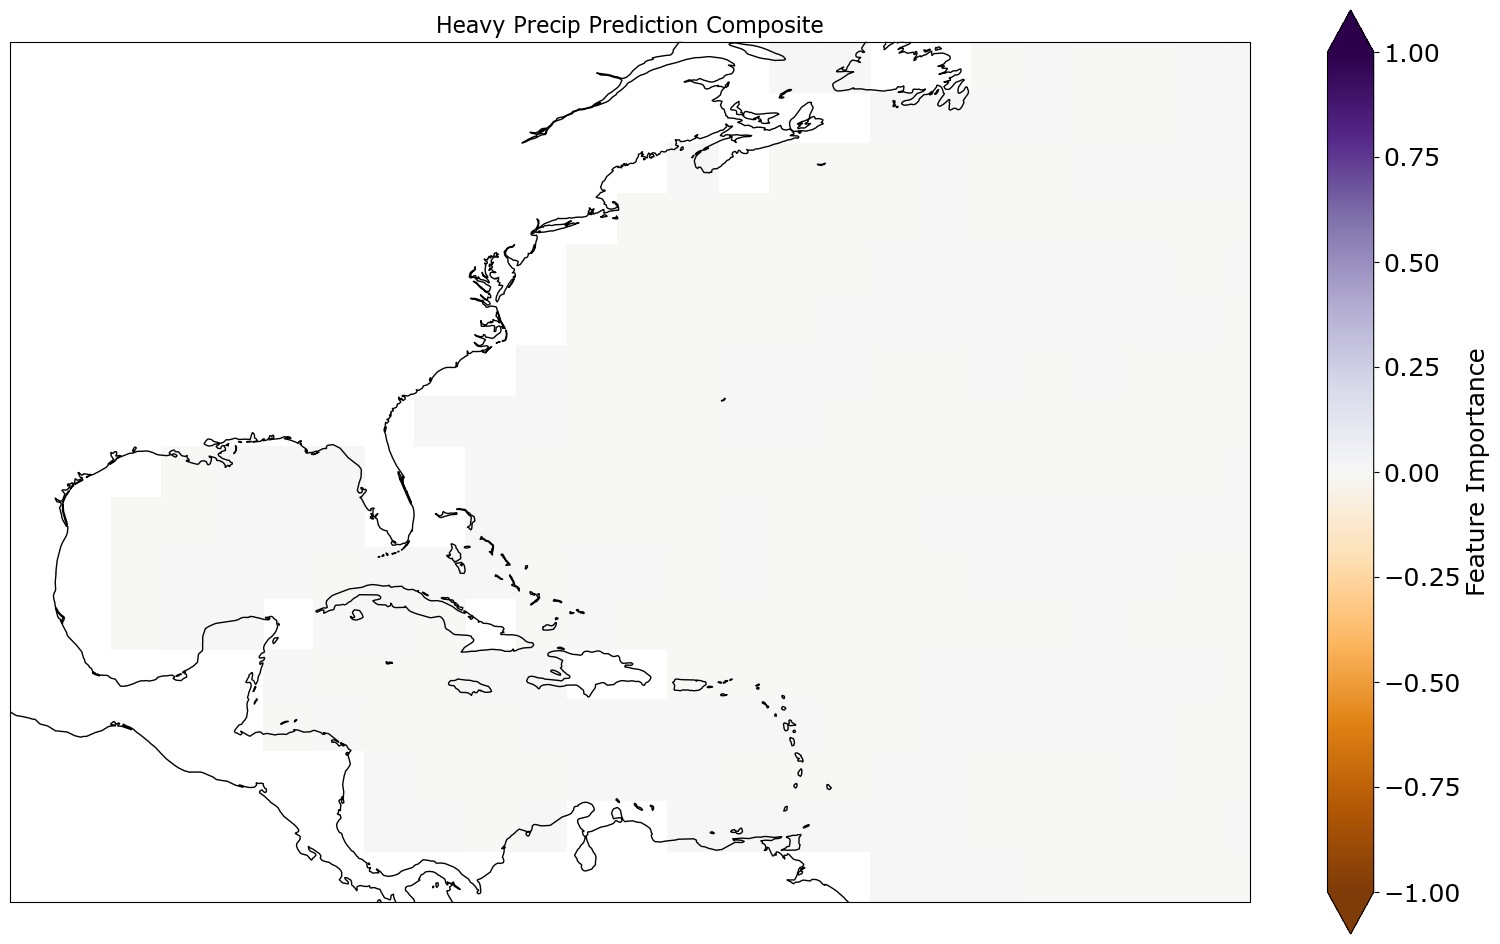

In [10]:
min_level = -1 
max_level = 1 
step_level = 0.1
levels = np.arange(min_level,max_level,step_level)
cmap = 'PuOr'

fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(20, 12), subplot_kw={"projection": ccrs.PlateCarree(central_longitude=200)})

#Light Week 0
ax.set_title('Heavy Precip Prediction Composite' , fontsize = '16', fontweight = 'light')
#XAI_0_comp_lead0, cyclic_lons = add_cyclic_point(XAI_0_comp_lead0, coord=XAI_0_comp_leadall.lon)
cf = ax.pcolor(cyclic_lons,XAI_1_comp_leadall.lat,XAI_1_comp_leadall[0,:,:], transform = ccrs.PlateCarree(), cmap =cmap,vmin = min_level, vmax=max_level)
ax.add_feature(cfeature.COASTLINE)
ax.set_extent(extent,crs=ccrs.PlateCarree())
fig.colorbar(cf,ax=ax, label='Feature Importance', extend='both')

ValueError: The length of the coordinate does not match the size of the corresponding dimension of the data array: len(coord) = 23, data.shape[-1] = 24.

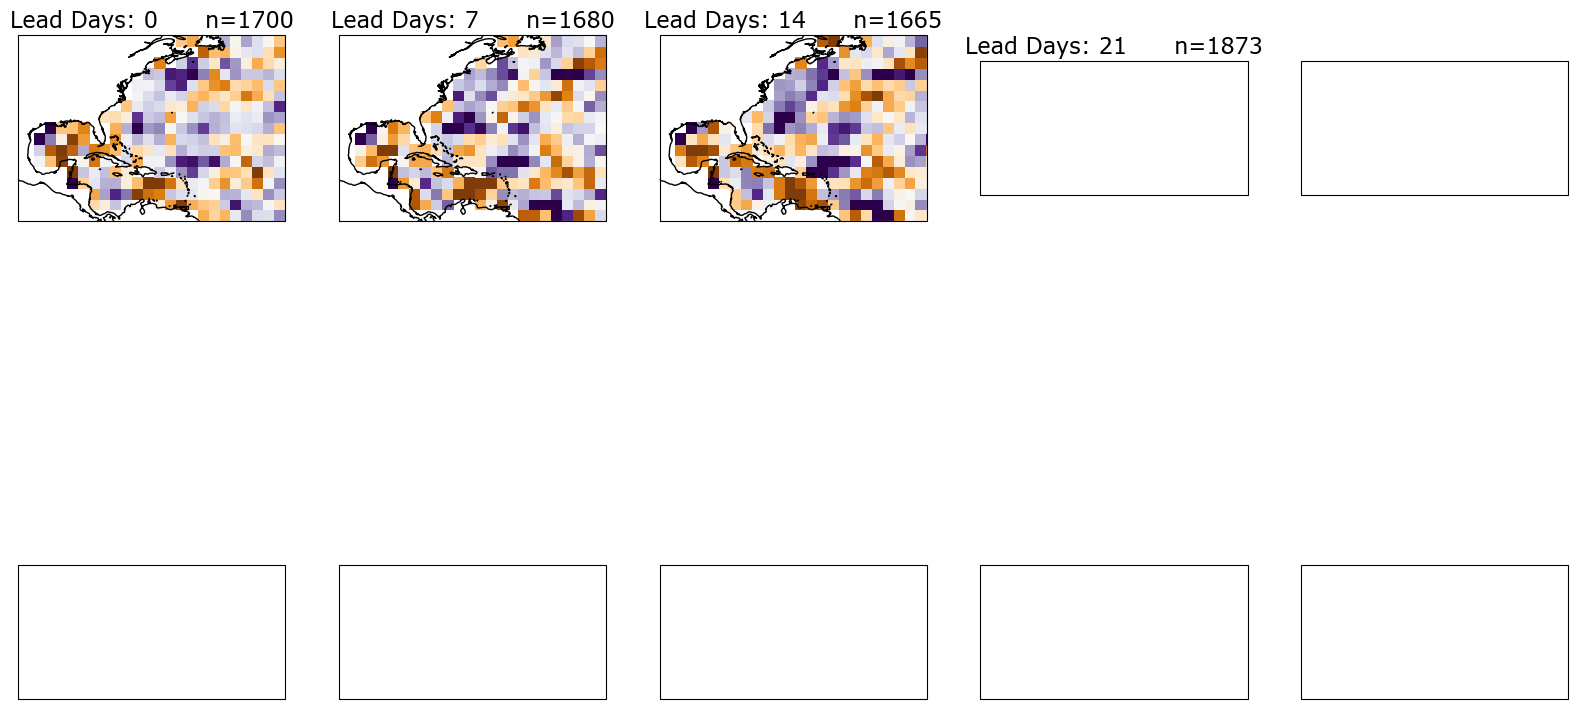

In [11]:
linewidth_default = 2.0
fig_text_default = 18.
fig_title_default = fig_text_default*1.5

plt.rc('lines', linewidth=linewidth_default)    
plt.rc('text', usetex=False)
plt.rc('font', size=fig_text_default, weight='normal',family='sans-serif')
plt.rc('axes',titlesize=fig_title_default,titleweight='bold')
mpl.rcParams['figure.dpi'] = 100

min_level = -0.003 
max_level = 0.003 
step_level = 0.0001
levels = np.arange(min_level,max_level,step_level)
cmap = 'PuOr'
extent = [np.min(XAI_0_comp_leadall.lon)-5, np.max(XAI_0_comp_leadall.lon)+1.25, np.min(XAI_0_comp_leadall.lat)-1.25, np.max(XAI_0_comp_leadall.lat)+1.25]

#fig, ((ax00, ax01), (ax10, ax11)) = plt.subplots(nrows=2,ncols=lead_week, figsize=(14, 8), subplot_kw={"projection": ccrs.PlateCarree(central_longitude=200)})
fig, ((ax00, ax01, ax02, ax03, ax04), (ax10, ax11, ax12, ax13, ax14)) = plt.subplots(nrows=2,ncols=5, figsize=(20, 12), subplot_kw={"projection": ccrs.PlateCarree(central_longitude=200)})

#Light Week 0
ax00.set_title('Lead Days: 0      n='+str(int(count_num_0[0])) , fontsize = '16', fontweight = 'light') #n='+str(count_1)
XAI_0_comp_lead0, cyclic_lons = add_cyclic_point(XAI_0_comp_lead0, coord=XAI_0_comp_leadall.lon)
cf0 = ax00.pcolor(cyclic_lons,XAI_0_comp_leadall.lat, XAI_0_comp_lead0, transform = ccrs.PlateCarree(), cmap =cmap,vmin = min_level, vmax=max_level)
ax00.add_feature(cfeature.COASTLINE)
ax00.set_extent(extent,crs=ccrs.PlateCarree())
#ax00.text(0.1, 0.9, 'text', size=15, color='purple')

#Light Week 1
ax01.set_title('Lead Days: 7      n='+str(int(count_num_0[1])), fontsize = '16', fontweight = 'light') #n='+str(count_1)
XAI_0_comp_lead1, cyclic_lons = add_cyclic_point(XAI_0_comp_lead1, coord=XAI_0_comp_leadall.lon)
cf1 = ax01.pcolor(cyclic_lons,XAI_0_comp_leadall.lat, XAI_0_comp_lead1, transform = ccrs.PlateCarree(), cmap =cmap,vmin = min_level, vmax=max_level)
ax01.add_feature(cfeature.COASTLINE)
ax01.set_extent(extent,crs=ccrs.PlateCarree())

#Light Week 2
ax02.set_title('Lead Days: 14      n='+str(int(count_num_0[2])), fontsize = '16', fontweight = 'light') #n='+str(count_1)
XAI_0_comp_lead2, cyclic_lons = add_cyclic_point(XAI_0_comp_lead2, coord=XAI_0_comp_leadall.lon)
cf2 = ax02.pcolor(cyclic_lons,XAI_0_comp_leadall.lat, XAI_0_comp_lead2, transform = ccrs.PlateCarree(), cmap =cmap,vmin = min_level, vmax=max_level)
ax02.add_feature(cfeature.COASTLINE)
ax02.set_extent(extent,crs=ccrs.PlateCarree())

#Light Week 3
#ax03.set_title('Light Lead Week 3', fontsize = '16', fontweight = 'light') #n='+str(count_1)
ax03.set_title('Lead Days: 21      n='+str(int(count_num_0[3])), fontsize = '16', fontweight = 'light') #n='+str(count_1)

XAI_0_comp_lead3, cyclic_lons = add_cyclic_point(XAI_0_comp_lead3, coord=XAI_0_comp_leadall.lon)
cf3 = ax03.pcolor(cyclic_lons,XAI_0_comp_leadall.lat, XAI_0_comp_lead3, transform = ccrs.PlateCarree(), cmap =cmap,vmin = min_level, vmax=max_level)
ax03.add_feature(cfeature.COASTLINE)
ax03.set_extent(extent,crs=ccrs.PlateCarree())

#Light Week 4
ax04.set_title('Lead Days: 28      n='+str(int(count_num_0[4])), fontsize = '16', fontweight = 'light') #n='+str(count_1)
XAI_0_comp_lead4, cyclic_lons = add_cyclic_point(XAI_0_comp_lead4, coord=XAI_0_comp_leadall.lon)
cf4 = ax04.pcolor(cyclic_lons,XAI_0_comp_leadall.lat, XAI_0_comp_lead4, transform = ccrs.PlateCarree(), cmap =cmap,vmin = min_level, vmax=max_level)
ax04.add_feature(cfeature.COASTLINE)
ax04.set_extent(extent,crs=ccrs.PlateCarree())

#Heavy Week 0
ax10.set_title('Lead Days: 0      n='+str(int(count_num_1[0])), fontsize = '16', fontweight = 'light') #n='+str(count_1)
XAI_1_comp_lead0, cyclic_lons = add_cyclic_point(XAI_1_comp_lead0, coord=XAI_1_comp_leadall.lon)
cf5 = ax10.pcolor(cyclic_lons,XAI_0_comp_leadall.lat, XAI_1_comp_lead0, transform = ccrs.PlateCarree(), cmap =cmap,vmin = min_level, vmax=max_level)
ax10.add_feature(cfeature.COASTLINE)
ax10.set_extent(extent,crs=ccrs.PlateCarree())

#Heavy Week 1
ax11.set_title('Lead Days: 7      n='+str(int(count_num_1[1])), fontsize = '16', fontweight = 'light') #n='+str(count_1)
XAI_1_comp_lead1, cyclic_lons = add_cyclic_point(XAI_1_comp_lead1, coord=XAI_1_comp_leadall.lon)
cf6 = ax11.pcolor(cyclic_lons,XAI_1_comp_leadall.lat, XAI_1_comp_lead1, transform = ccrs.PlateCarree(), cmap =cmap,vmin = min_level, vmax=max_level)
ax11.add_feature(cfeature.COASTLINE)
ax11.set_extent(extent,crs=ccrs.PlateCarree())
# #fig.colorbar(cf0,ax=ax0)

#Heavy Week 2
ax12.set_title('Lead Days: 14      n='+str(int(count_num_1[2])), fontsize = '16', fontweight = 'light') #n='+str(count_1)
XAI_1_comp_lead2, cyclic_lons = add_cyclic_point(XAI_1_comp_lead2, coord=XAI_1_comp_leadall.lon)
cf7 = ax12.pcolor(cyclic_lons,XAI_1_comp_leadall.lat, XAI_1_comp_lead2, transform = ccrs.PlateCarree(), cmap =cmap,vmin = min_level, vmax=max_level)
ax12.add_feature(cfeature.COASTLINE)
ax12.set_extent(extent,crs=ccrs.PlateCarree())

#Heavy Week 3
#ax13.set_title('Heavy Lead Week 3', fontsize = '16', fontweight = 'light') #n='+str(count_1)
ax13.set_title('Lead Days: 21      n='+str(int(count_num_1[3])), fontsize = '16', fontweight = 'light') #n='+str(count_1)

XAI_1_comp_lead3, cyclic_lons = add_cyclic_point(XAI_1_comp_lead3, coord=XAI_1_comp_leadall.lon)
cf8 = ax13.pcolor(cyclic_lons,XAI_1_comp_leadall.lat, XAI_1_comp_lead3, transform = ccrs.PlateCarree(), cmap =cmap,vmin = min_level, vmax=max_level)
ax13.add_feature(cfeature.COASTLINE)
ax13.set_extent(extent,crs=ccrs.PlateCarree())

#Heavy Week 4
ax14.set_title('Lead Days: 28      n='+str(int(count_num_1[4])), fontsize = '16', fontweight = 'light') #n='+str(count_1)
XAI_1_comp_lead4, cyclic_lons = add_cyclic_point(XAI_1_comp_lead4, coord=XAI_1_comp_leadall.lon)
cf9 = ax14.pcolor(cyclic_lons,XAI_1_comp_leadall.lat, XAI_1_comp_lead4, transform = ccrs.PlateCarree(), cmap =cmap,vmin = min_level, vmax=max_level)
ax14.add_feature(cfeature.COASTLINE)
ax14.set_extent(extent,crs=ccrs.PlateCarree())

plt.subplots_adjust(wspace=0.1, hspace=-0.3)
#fig.colorbar(cf9,ax=ax14, pad=10)

#plt.savefig('/Users/marcodia/Research/salinity_s2s/Scripts/figs/XAI_Foos_lead0-5.png', dpi=150)
plt.show()


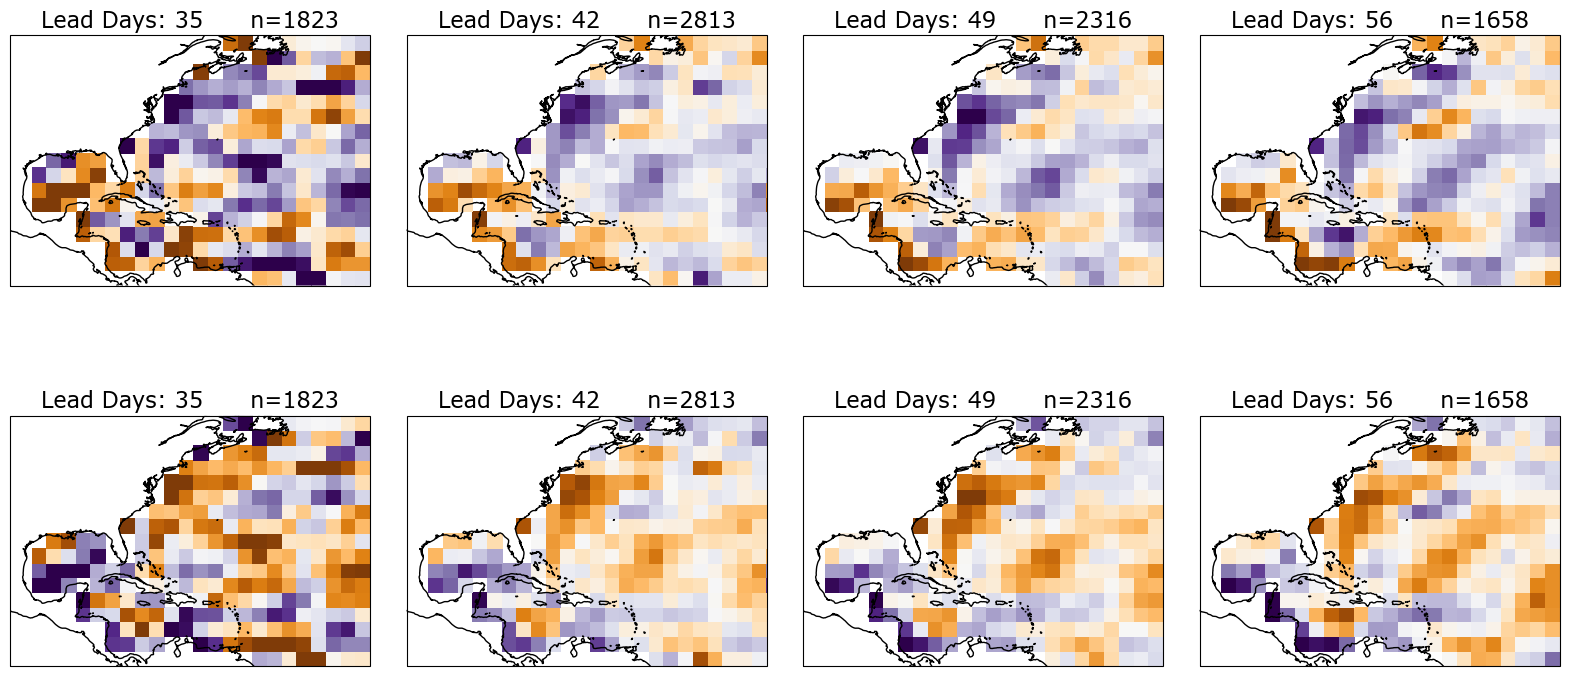

In [12]:
linewidth_default = 2.0
fig_text_default = 18.
fig_title_default = fig_text_default*1.5

plt.rc('lines', linewidth=linewidth_default)    
plt.rc('text', usetex=False)
plt.rc('font', size=fig_text_default, weight='normal',family='sans-serif')
plt.rc('axes',titlesize=fig_title_default,titleweight='bold')
mpl.rcParams['figure.dpi'] = 100

min_level = -0.003 
max_level = 0.003 
step_level = 0.0001
levels = np.arange(min_level,max_level,step_level)
cmap = 'PuOr'
extent = [np.min(XAI_0_comp_leadall.lon)-5, np.max(XAI_0_comp_leadall.lon)+1.25, np.min(XAI_0_comp_leadall.lat)-1.25, np.max(XAI_0_comp_leadall.lat)+1.25]

#fig, ((ax00, ax01), (ax10, ax11)) = plt.subplots(nrows=2,ncols=lead_week, figsize=(14, 8), subplot_kw={"projection": ccrs.PlateCarree(central_longitude=200)})
fig, ((ax00, ax01, ax02, ax03), (ax10, ax11, ax12, ax13)) = plt.subplots(nrows=2,ncols=4, figsize=(20, 12), subplot_kw={"projection": ccrs.PlateCarree(central_longitude=200)})

#Light Week 0
ax00.set_title('Lead Days: 35      n='+str(int(count_num_0[5])) , fontsize = '16', fontweight = 'light') #n='+str(count_1)
XAI_0_comp_lead5, cyclic_lons = add_cyclic_point(XAI_0_comp_lead5, coord=XAI_0_comp_leadall.lon)
cf0 = ax00.pcolor(cyclic_lons,XAI_0_comp_leadall.lat, XAI_0_comp_lead5, transform = ccrs.PlateCarree(), cmap =cmap,vmin = min_level, vmax=max_level)
ax00.add_feature(cfeature.COASTLINE)
ax00.set_extent(extent,crs=ccrs.PlateCarree())
#ax00.text(0.1, 0.9, 'text', size=15, color='purple')

#Light Week 1
ax01.set_title('Lead Days: 42      n='+str(int(count_num_0[6])), fontsize = '16', fontweight = 'light') #n='+str(count_1)
XAI_0_comp_lead6, cyclic_lons = add_cyclic_point(XAI_0_comp_lead6, coord=XAI_0_comp_leadall.lon)
cf1 = ax01.pcolor(cyclic_lons,XAI_0_comp_leadall.lat, XAI_0_comp_lead6, transform = ccrs.PlateCarree(), cmap =cmap,vmin = min_level, vmax=max_level)
ax01.add_feature(cfeature.COASTLINE)
ax01.set_extent(extent,crs=ccrs.PlateCarree())

#Light Week 2
ax02.set_title('Lead Days: 49      n='+str(int(count_num_0[7])), fontsize = '16', fontweight = 'light') #n='+str(count_1)
XAI_0_comp_lead7, cyclic_lons = add_cyclic_point(XAI_0_comp_lead7, coord=XAI_0_comp_leadall.lon)
cf2 = ax02.pcolor(cyclic_lons,XAI_0_comp_leadall.lat, XAI_0_comp_lead7, transform = ccrs.PlateCarree(), cmap =cmap,vmin = min_level, vmax=max_level)
ax02.add_feature(cfeature.COASTLINE)
ax02.set_extent(extent,crs=ccrs.PlateCarree())

#Light Week 3
#ax03.set_title('Light Lead Week 3', fontsize = '16', fontweight = 'light') #n='+str(count_1)
ax03.set_title('Lead Days: 56      n='+str(int(count_num_0[8])), fontsize = '16', fontweight = 'light') #n='+str(count_1)
XAI_0_comp_lead8, cyclic_lons = add_cyclic_point(XAI_0_comp_lead8, coord=XAI_0_comp_leadall.lon)
cf3 = ax03.pcolor(cyclic_lons,XAI_0_comp_leadall.lat, XAI_0_comp_lead8, transform = ccrs.PlateCarree(), cmap =cmap,vmin = min_level, vmax=max_level)
ax03.add_feature(cfeature.COASTLINE)
ax03.set_extent(extent,crs=ccrs.PlateCarree())

#Heavy Week 0
ax10.set_title('Lead Days: 35      n='+str(int(count_num_1[5])), fontsize = '16', fontweight = 'light') #n='+str(count_1)
XAI_1_comp_lead5, cyclic_lons = add_cyclic_point(XAI_1_comp_lead5, coord=XAI_1_comp_leadall.lon)
cf5 = ax10.pcolor(cyclic_lons,XAI_0_comp_leadall.lat, XAI_1_comp_lead5, transform = ccrs.PlateCarree(), cmap =cmap,vmin = min_level, vmax=max_level)
ax10.add_feature(cfeature.COASTLINE)
ax10.set_extent(extent,crs=ccrs.PlateCarree())

#Heavy Week 1
ax11.set_title('Lead Days: 42      n='+str(int(count_num_1[6])), fontsize = '16', fontweight = 'light') #n='+str(count_1)
XAI_1_comp_lead6, cyclic_lons = add_cyclic_point(XAI_1_comp_lead6, coord=XAI_1_comp_leadall.lon)
cf6 = ax11.pcolor(cyclic_lons,XAI_1_comp_leadall.lat, XAI_1_comp_lead6, transform = ccrs.PlateCarree(), cmap =cmap,vmin = min_level, vmax=max_level)
ax11.add_feature(cfeature.COASTLINE)
ax11.set_extent(extent,crs=ccrs.PlateCarree())
# #fig.colorbar(cf0,ax=ax0)

#Heavy Week 2
ax12.set_title('Lead Days: 49      n='+str(int(count_num_1[7])), fontsize = '16', fontweight = 'light') #n='+str(count_1)
XAI_1_comp_lead7, cyclic_lons = add_cyclic_point(XAI_1_comp_lead7, coord=XAI_1_comp_leadall.lon)
cf7 = ax12.pcolor(cyclic_lons,XAI_1_comp_leadall.lat, XAI_1_comp_lead7, transform = ccrs.PlateCarree(), cmap =cmap,vmin = min_level, vmax=max_level)
ax12.add_feature(cfeature.COASTLINE)
ax12.set_extent(extent,crs=ccrs.PlateCarree())

#Heavy Week 3
#ax13.set_title('Heavy Lead Week 3', fontsize = '16', fontweight = 'light') #n='+str(count_1)
ax13.set_title('Lead Days: 56      n='+str(int(count_num_1[8])), fontsize = '16', fontweight = 'light') #n='+str(count_1)

XAI_1_comp_lead8, cyclic_lons = add_cyclic_point(XAI_1_comp_lead8, coord=XAI_1_comp_leadall.lon)
cf8 = ax13.pcolor(cyclic_lons,XAI_1_comp_leadall.lat, XAI_1_comp_lead8, transform = ccrs.PlateCarree(), cmap =cmap,vmin = min_level, vmax=max_level)
ax13.add_feature(cfeature.COASTLINE)
ax13.set_extent(extent,crs=ccrs.PlateCarree())

plt.subplots_adjust(wspace=0.1, hspace=-0.3)
#fig.colorbar(cf9,ax=ax14, pad=10)

#plt.savefig('/Users/marcodia/Research/salinity_s2s/Scripts/figs/XAI_Foos_lead5-8.png', dpi=150)
plt.show()


## Just to plot colorbar

In [13]:
file_readin = xr.open_dataarray('/Users/marcodia/Research/Data/global_daily_anomalies/SSS_global_1850-1949_ens0_dailyanom_detrend.nc')
X_nplat = np.array(file_readin.lat)
X_nplon = np.array(file_readin.lon)

comp_0_leadall = xr.DataArray(np.zeros((lead_week,num_ens,file_readin.shape[1],file_readin.shape[2])),
                             dims = ['lead','ens','lat','lon'],
                             coords = [('lead',np.arange(0,lead_week)),('ens',np.arange(0,num_ens)),('lat',X_nplat),('lon',X_nplon)])

comp_1_leadall = xr.DataArray(np.zeros((lead_week,num_ens,file_readin.shape[1],file_readin.shape[2])),
                             dims = ['lead','ens','lat','lon'],
                             coords = [('lead',np.arange(0,lead_week)),('ens',np.arange(0,num_ens)),('lat',X_nplat),('lon',X_nplon)])

In [14]:
file_plot = np.mean(file_readin[150:153,:,:],axis=0)
file_plot

<xarray.DataArray (lat: 72, lon: 144)>
array([[        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       ...,
       [-0.20246762, -0.19782223, -0.19370903, ..., -0.21809607,
        -0.2170737 , -0.21023313],
       [-0.26217061, -0.26095248, -0.26019739, ..., -0.26617907,
        -0.26526356, -0.26363452],
       [-0.27213992, -0.27285481, -0.27356069, ..., -0.26849233,
        -0.26977496, -0.27098298]])
Coordinates:
  * lat      (lat) float64 -88.75 -86.25 -83.75 -81.25 ... 83.75 86.25 88.75
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5

In [15]:
count_num_0 = np.zeros((lead_week,1)) 
count_num_1 = np.zeros((lead_week,1)) 

for w in np.arange(0,lead_week):    
    count_0 = 0 
    count_1 = 0
    for i in np.arange(0,5):
        SSS_finame = 'SSS_global_1850-1949_ens'+str(i)+'_dailyanom_detrend.nc'
        SSS_full = xr.open_dataarray('/Users/marcodia/Research/Data/global_daily_anomalies/'+SSS_finame)
        X_finame = 'XAI_pred0_true0_'+str(w)+'wklead_testens'+str(i)+'.nc'
        comp_0_single = xr.open_dataarray(ddir_X+X_finame)
        XAI_0_single = SSS_full.where(SSS_full.time == comp_0_single.time, drop=True)
        count0 = len(XAI_0_single.time)
        count_0 = count_0 + count0
        XAI_0_timemean = np.mean(XAI_0_single,axis=0)
        comp_0_leadall[w,i,:,:] = XAI_0_timemean
        
        X1_finame = 'XAI_pred1_true1_'+str(w)+'wklead_testens'+str(i)+'.nc'
        comp_1_single = xr.open_dataarray(ddir_X+X1_finame)
        XAI_1_single = SSS_full.where(SSS_full.time == comp_1_single.time, drop=True)        
        count1 = len(XAI_1_single.time)
        count_1 = count_1 + count1
        XAI_1_timemean = np.mean(XAI_1_single,axis=0)
        comp_1_leadall[w,i,:,:] = XAI_1_timemean
    if i == 4:
        count_num_0[w,:] = count_0
        count_num_1[w,:] = count_1

In [16]:
count_num_1

array([[1700.],
       [1680.],
       [1665.],
       [1873.],
       [1963.],
       [1823.],
       [2813.],
       [2316.],
       [1658.]])

In [17]:
XAI_0_comp_leadall = np.mean(comp_0_leadall,axis=1)
XAI_1_comp_leadall = np.mean(comp_1_leadall,axis=1)


XAI_0_comp_lead0 = XAI_0_comp_leadall[0,:,:]
XAI_0_comp_lead1 = XAI_0_comp_leadall[1,:,:]
XAI_0_comp_lead2 = XAI_0_comp_leadall[2,:,:]
XAI_0_comp_lead3 = XAI_0_comp_leadall[3,:,:]
XAI_0_comp_lead4 = XAI_0_comp_leadall[4,:,:]
XAI_0_comp_lead5 = XAI_0_comp_leadall[5,:,:]
XAI_0_comp_lead6 = XAI_0_comp_leadall[6,:,:]
XAI_0_comp_lead7 = XAI_0_comp_leadall[7,:,:]
XAI_0_comp_lead8 = XAI_0_comp_leadall[8,:,:]

XAI_1_comp_lead0 = XAI_1_comp_leadall[0,:,:]
XAI_1_comp_lead1 = XAI_1_comp_leadall[1,:,:]
XAI_1_comp_lead2 = XAI_1_comp_leadall[2,:,:]
XAI_1_comp_lead3 = XAI_1_comp_leadall[3,:,:]
XAI_1_comp_lead4 = XAI_1_comp_leadall[4,:,:]
XAI_1_comp_lead5 = XAI_1_comp_leadall[5,:,:]
XAI_1_comp_lead6 = XAI_1_comp_leadall[6,:,:]
XAI_1_comp_lead7 = XAI_1_comp_leadall[7,:,:]
XAI_1_comp_lead8 = XAI_1_comp_leadall[8,:,:]

In [18]:
#XAI_0_leadall

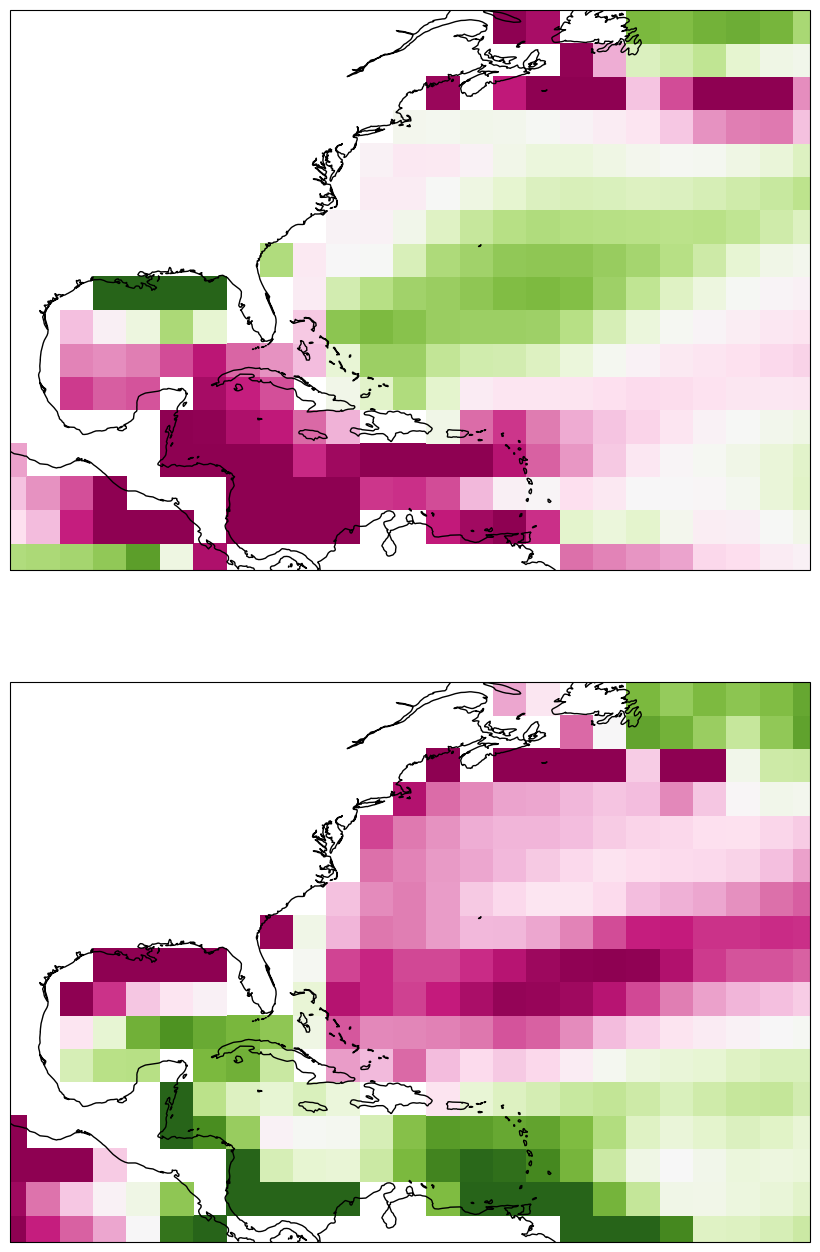

<Figure size 640x480 with 0 Axes>

In [19]:
linewidth_default = 2.0
fig_text_default = 18.
fig_title_default = fig_text_default*1.5

plt.rc('lines', linewidth=linewidth_default)    
plt.rc('text', usetex=False)
plt.rc('font', size=fig_text_default, weight='normal',family='sans-serif')
plt.rc('axes',titlesize=fig_title_default,titleweight='bold')
mpl.rcParams['figure.dpi'] = 100

min_level = -0.05 
max_level = 0.05 
step_level = 0.001
levels = np.arange(min_level,max_level,step_level)
cmap = 'PiYG'
# ----- X TRAINING ------
min_lon = 260 
min_lat = 8 
max_lon = 320 
max_lat = 50 

extent = [min_lon, max_lon, min_lat, max_lat]

#fig, ((ax00, ax01), (ax10, ax11)) = plt.subplots(nrows=2,ncols=lead_week, figsize=(14, 8), subplot_kw={"projection": ccrs.PlateCarree(central_longitude=200)})
fig, ((ax03), (ax13)) = plt.subplots(nrows=2,ncols=1, figsize=(30, 16), subplot_kw={"projection": ccrs.PlateCarree(central_longitude=200)})

#Light Week 3
#ax03.set_title('Light Lead Week 3', fontsize = '16', fontweight = 'light') #n='+str(count_1)
#ax03.set_title('Light Precip Prediction Composite    n='+str(int(count_num_0[3])), fontsize = '26', fontweight = 'light') #n='+str(count_1)

XAI_0_comp_lead3, cyclic_lons = add_cyclic_point(XAI_0_comp_lead3, coord=XAI_0_comp_leadall.lon)
cf3 = ax03.pcolor(cyclic_lons,XAI_0_comp_leadall.lat, XAI_0_comp_lead3, transform = ccrs.PlateCarree(), cmap =cmap,vmin = min_level, vmax=max_level)
ax03.add_feature(cfeature.COASTLINE)
ax03.set_extent(extent,crs=ccrs.PlateCarree())


#Heavy Week 3
#ax13.set_title('Heavy Lead Week 3', fontsize = '16', fontweight = 'light') #n='+str(count_1)
#ax13.set_title('Heavy Precip Prediction Composite    n='+str(int(count_num_1[3])), fontsize = '26', fontweight = 'light') #n='+str(count_1)

XAI_1_comp_lead3, cyclic_lons = add_cyclic_point(XAI_1_comp_lead3, coord=XAI_1_comp_leadall.lon)
cf8 = ax13.pcolor(cyclic_lons,XAI_1_comp_leadall.lat, XAI_1_comp_lead3, transform = ccrs.PlateCarree(), cmap =cmap,vmin = min_level, vmax=max_level)
ax13.add_feature(cfeature.COASTLINE)
ax13.set_extent(extent,crs=ccrs.PlateCarree())


plt.subplots_adjust(wspace=0.1, hspace=.2)
#fig.colorbar(cf9,ax=ax14, pad=10)

#plt.savefig('/Users/marcodia/Research/salinity_s2s/Scripts/figs/XAI_Foos_lead0-5.png', dpi=150)
plt.show()

#plt.savefig(ddir_out+'XAI_lead21.png', format='png',dpi=150)

ValueError: The length of the coordinate does not match the size of the corresponding dimension of the data array: len(coord) = 144, data.shape[-1] = 145.

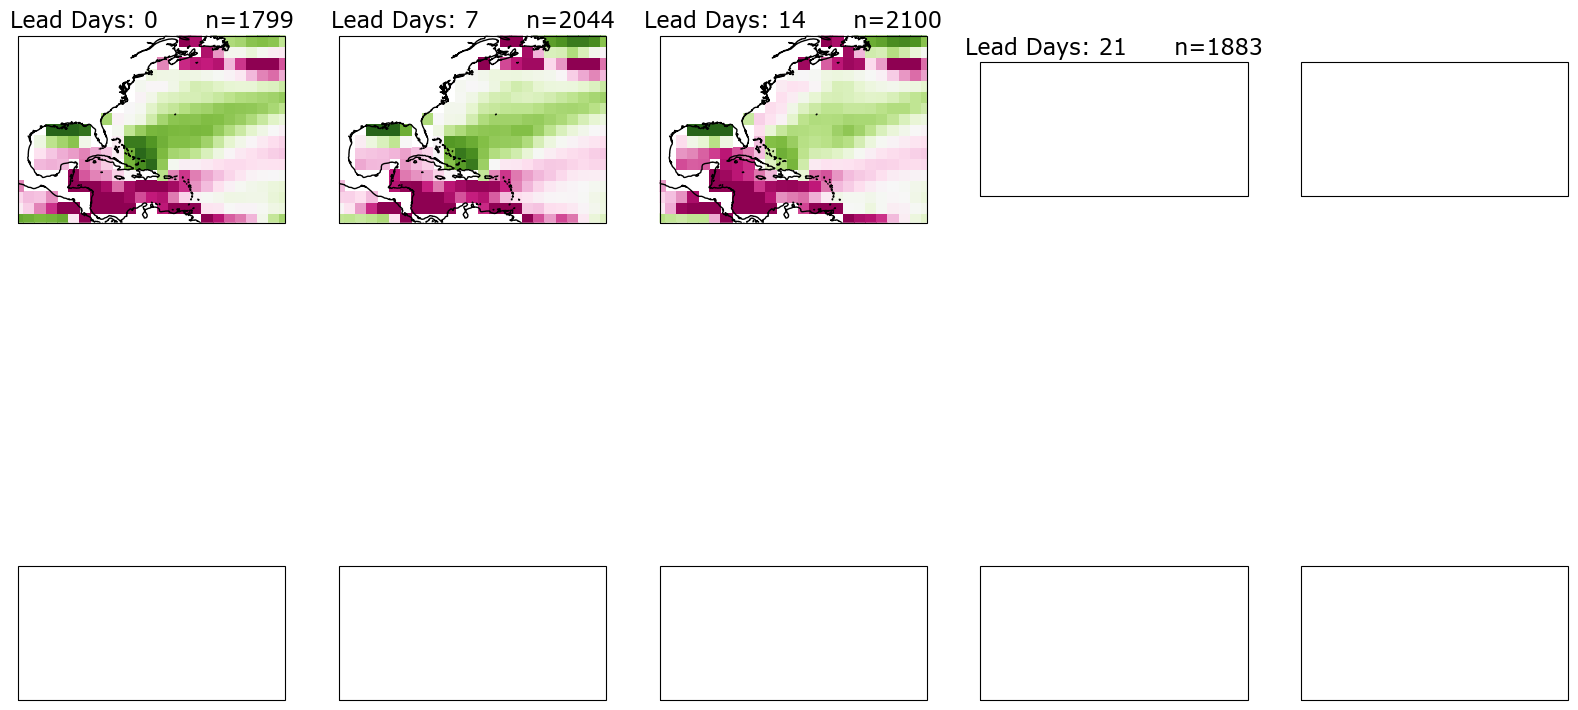

In [20]:
linewidth_default = 2.0
fig_text_default = 18.
fig_title_default = fig_text_default*1.5

plt.rc('lines', linewidth=linewidth_default)    
plt.rc('text', usetex=False)
plt.rc('font', size=fig_text_default, weight='normal',family='sans-serif')
plt.rc('axes',titlesize=fig_title_default,titleweight='bold')
mpl.rcParams['figure.dpi'] = 100

min_level = -0.05 
max_level = 0.05 
step_level = 0.001
levels = np.arange(min_level,max_level,step_level)
cmap = 'PiYG'
# ----- X TRAINING ------
min_lon = 260 
min_lat = 8 
max_lon = 320 
max_lat = 50 

extent = [min_lon, max_lon, min_lat, max_lat]
#extent = [np.min(XAI_0_comp_leadall.lon)-5, np.max(XAI_0_comp_leadall.lon)+1.25, np.min(XAI_0_comp_leadall.lat)-1.25, np.max(XAI_0_comp_leadall.lat)+1.25]

#fig, ((ax00, ax01), (ax10, ax11)) = plt.subplots(nrows=2,ncols=lead_week, figsize=(14, 8), subplot_kw={"projection": ccrs.PlateCarree(central_longitude=200)})
fig, ((ax00, ax01, ax02, ax03, ax04), (ax10, ax11, ax12, ax13, ax14)) = plt.subplots(nrows=2,ncols=5, figsize=(20, 12), subplot_kw={"projection": ccrs.PlateCarree(central_longitude=200)})

#Light Week 0
ax00.set_title('Lead Days: 0      n='+str(int(count_num_0[0])) , fontsize = '16', fontweight = 'light') #n='+str(count_1)
XAI_0_comp_lead0, cyclic_lons = add_cyclic_point(XAI_0_comp_lead0, coord=XAI_0_comp_leadall.lon)
cf0 = ax00.pcolor(cyclic_lons,XAI_0_comp_leadall.lat, XAI_0_comp_lead0, transform = ccrs.PlateCarree(), cmap =cmap,vmin = min_level, vmax=max_level)
ax00.add_feature(cfeature.COASTLINE)
ax00.set_extent(extent,crs=ccrs.PlateCarree())
#ax00.text(0.1, 0.9, 'text', size=15, color='purple')

#Light Week 1
ax01.set_title('Lead Days: 7      n='+str(int(count_num_0[1])), fontsize = '16', fontweight = 'light') #n='+str(count_1)
XAI_0_comp_lead1, cyclic_lons = add_cyclic_point(XAI_0_comp_lead1, coord=XAI_0_comp_leadall.lon)
cf1 = ax01.pcolor(cyclic_lons,XAI_0_comp_leadall.lat, XAI_0_comp_lead1, transform = ccrs.PlateCarree(), cmap =cmap,vmin = min_level, vmax=max_level)
ax01.add_feature(cfeature.COASTLINE)
ax01.set_extent(extent,crs=ccrs.PlateCarree())

#Light Week 2
ax02.set_title('Lead Days: 14      n='+str(int(count_num_0[2])), fontsize = '16', fontweight = 'light') #n='+str(count_1)
XAI_0_comp_lead2, cyclic_lons = add_cyclic_point(XAI_0_comp_lead2, coord=XAI_0_comp_leadall.lon)
cf2 = ax02.pcolor(cyclic_lons,XAI_0_comp_leadall.lat, XAI_0_comp_lead2, transform = ccrs.PlateCarree(), cmap =cmap,vmin = min_level, vmax=max_level)
ax02.add_feature(cfeature.COASTLINE)
ax02.set_extent(extent,crs=ccrs.PlateCarree())

#Light Week 3
#ax03.set_title('Light Lead Week 3', fontsize = '16', fontweight = 'light') #n='+str(count_1)
ax03.set_title('Lead Days: 21      n='+str(int(count_num_0[3])), fontsize = '16', fontweight = 'light') #n='+str(count_1)

XAI_0_comp_lead3, cyclic_lons = add_cyclic_point(XAI_0_comp_lead3, coord=XAI_0_comp_leadall.lon)
cf3 = ax03.pcolor(cyclic_lons,XAI_0_comp_leadall.lat, XAI_0_comp_lead3, transform = ccrs.PlateCarree(), cmap =cmap,vmin = min_level, vmax=max_level)
ax03.add_feature(cfeature.COASTLINE)
ax03.set_extent(extent,crs=ccrs.PlateCarree())

#Light Week 4
ax04.set_title('Lead Days: 28      n='+str(int(count_num_0[4])), fontsize = '16', fontweight = 'light') #n='+str(count_1)
XAI_0_comp_lead4, cyclic_lons = add_cyclic_point(XAI_0_comp_lead4, coord=XAI_0_comp_leadall.lon)
cf4 = ax04.pcolor(cyclic_lons,XAI_0_comp_leadall.lat, XAI_0_comp_lead4, transform = ccrs.PlateCarree(), cmap =cmap,vmin = min_level, vmax=max_level)
ax04.add_feature(cfeature.COASTLINE)
ax04.set_extent(extent,crs=ccrs.PlateCarree())

#Heavy Week 0
ax10.set_title('Lead Days: 0      n='+str(int(count_num_1[0])), fontsize = '16', fontweight = 'light') #n='+str(count_1)
XAI_1_comp_lead0, cyclic_lons = add_cyclic_point(XAI_1_comp_lead0, coord=XAI_1_comp_leadall.lon)
cf5 = ax10.pcolor(cyclic_lons,XAI_0_comp_leadall.lat, XAI_1_comp_lead0, transform = ccrs.PlateCarree(), cmap =cmap,vmin = min_level, vmax=max_level)
ax10.add_feature(cfeature.COASTLINE)
ax10.set_extent(extent,crs=ccrs.PlateCarree())

#Heavy Week 1
ax11.set_title('Lead Days: 7      n='+str(int(count_num_1[1])), fontsize = '16', fontweight = 'light') #n='+str(count_1)
XAI_1_comp_lead1, cyclic_lons = add_cyclic_point(XAI_1_comp_lead1, coord=XAI_1_comp_leadall.lon)
cf6 = ax11.pcolor(cyclic_lons,XAI_1_comp_leadall.lat, XAI_1_comp_lead1, transform = ccrs.PlateCarree(), cmap =cmap,vmin = min_level, vmax=max_level)
ax11.add_feature(cfeature.COASTLINE)
ax11.set_extent(extent,crs=ccrs.PlateCarree())
# #fig.colorbar(cf0,ax=ax0)

#Heavy Week 2
ax12.set_title('Lead Days: 14      n='+str(int(count_num_1[2])), fontsize = '16', fontweight = 'light') #n='+str(count_1)
XAI_1_comp_lead2, cyclic_lons = add_cyclic_point(XAI_1_comp_lead2, coord=XAI_1_comp_leadall.lon)
cf7 = ax12.pcolor(cyclic_lons,XAI_1_comp_leadall.lat, XAI_1_comp_lead2, transform = ccrs.PlateCarree(), cmap =cmap,vmin = min_level, vmax=max_level)
ax12.add_feature(cfeature.COASTLINE)
ax12.set_extent(extent,crs=ccrs.PlateCarree())

#Heavy Week 3
#ax13.set_title('Heavy Lead Week 3', fontsize = '16', fontweight = 'light') #n='+str(count_1)
ax13.set_title('Lead Days: 21      n='+str(int(count_num_1[3])), fontsize = '16', fontweight = 'light') #n='+str(count_1)

XAI_1_comp_lead3, cyclic_lons = add_cyclic_point(XAI_1_comp_lead3, coord=XAI_1_comp_leadall.lon)
cf8 = ax13.pcolor(cyclic_lons,XAI_1_comp_leadall.lat, XAI_1_comp_lead3, transform = ccrs.PlateCarree(), cmap =cmap,vmin = min_level, vmax=max_level)
ax13.add_feature(cfeature.COASTLINE)
ax13.set_extent(extent,crs=ccrs.PlateCarree())

#Heavy Week 4
ax14.set_title('Lead Days: 28      n='+str(int(count_num_1[4])), fontsize = '16', fontweight = 'light') #n='+str(count_1)
XAI_1_comp_lead4, cyclic_lons = add_cyclic_point(XAI_1_comp_lead4, coord=XAI_1_comp_leadall.lon)
cf9 = ax14.pcolor(cyclic_lons,XAI_1_comp_leadall.lat, XAI_1_comp_lead4, transform = ccrs.PlateCarree(), cmap =cmap,vmin = min_level, vmax=max_level)
ax14.add_feature(cfeature.COASTLINE)
ax14.set_extent(extent,crs=ccrs.PlateCarree())

plt.subplots_adjust(wspace=0.1, hspace=-0.3)
#fig.colorbar(cf9,ax=ax14, pad=10)

#plt.savefig('/Users/marcodia/Research/salinity_s2s/Scripts/figs/XAI_Foos_lead0-5.png', dpi=150)
plt.show()


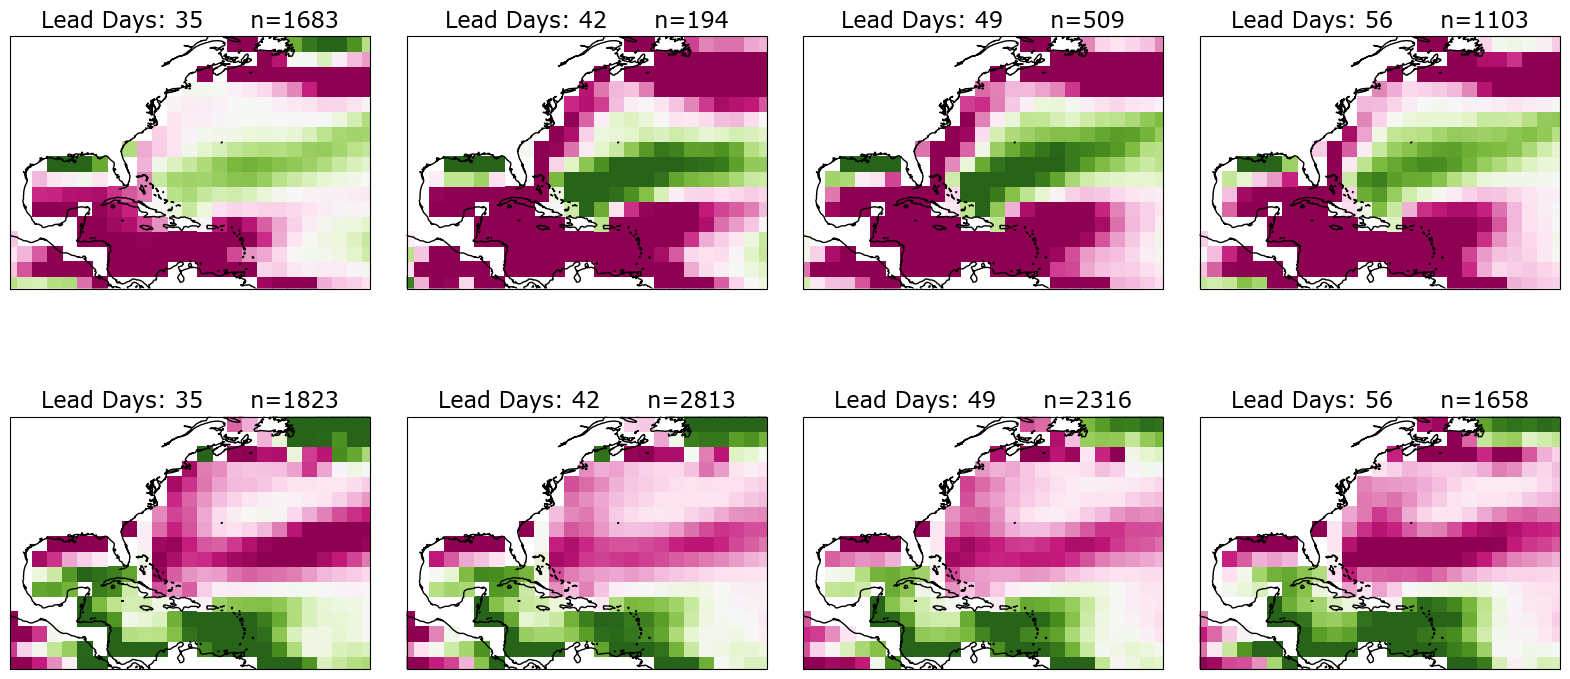

In [21]:
linewidth_default = 2.0
fig_text_default = 18.
fig_title_default = fig_text_default*1.5

plt.rc('lines', linewidth=linewidth_default)    
plt.rc('text', usetex=False)
plt.rc('font', size=fig_text_default, weight='normal',family='sans-serif')
plt.rc('axes',titlesize=fig_title_default,titleweight='bold')
mpl.rcParams['figure.dpi'] = 100

min_level = -0.05 
max_level = 0.05 
step_level = 0.001
levels = np.arange(min_level,max_level,step_level)
cmap = 'PiYG'
# ----- X TRAINING ------
min_lon = 260 
min_lat = 8 
max_lon = 320 
max_lat = 50 

extent = [min_lon, max_lon, min_lat, max_lat]

#fig, ((ax00, ax01), (ax10, ax11)) = plt.subplots(nrows=2,ncols=lead_week, figsize=(14, 8), subplot_kw={"projection": ccrs.PlateCarree(central_longitude=200)})
fig, ((ax00, ax01, ax02, ax03), (ax10, ax11, ax12, ax13)) = plt.subplots(nrows=2,ncols=4, figsize=(20, 12), subplot_kw={"projection": ccrs.PlateCarree(central_longitude=200)})

#Light Week 0
ax00.set_title('Lead Days: 35      n='+str(int(count_num_0[5])) , fontsize = '16', fontweight = 'light') #n='+str(count_1)
XAI_0_comp_lead5, cyclic_lons = add_cyclic_point(XAI_0_comp_lead5, coord=XAI_0_comp_leadall.lon)
cf0 = ax00.pcolor(cyclic_lons,XAI_0_comp_leadall.lat, XAI_0_comp_lead5, transform = ccrs.PlateCarree(), cmap =cmap,vmin = min_level, vmax=max_level)
ax00.add_feature(cfeature.COASTLINE)
ax00.set_extent(extent,crs=ccrs.PlateCarree())
#ax00.text(0.1, 0.9, 'text', size=15, color='purple')

#Light Week 1
ax01.set_title('Lead Days: 42      n='+str(int(count_num_0[6])), fontsize = '16', fontweight = 'light') #n='+str(count_1)
XAI_0_comp_lead6, cyclic_lons = add_cyclic_point(XAI_0_comp_lead6, coord=XAI_0_comp_leadall.lon)
cf1 = ax01.pcolor(cyclic_lons,XAI_0_comp_leadall.lat, XAI_0_comp_lead6, transform = ccrs.PlateCarree(), cmap =cmap,vmin = min_level, vmax=max_level)
ax01.add_feature(cfeature.COASTLINE)
ax01.set_extent(extent,crs=ccrs.PlateCarree())

#Light Week 2
ax02.set_title('Lead Days: 49      n='+str(int(count_num_0[7])), fontsize = '16', fontweight = 'light') #n='+str(count_1)
XAI_0_comp_lead7, cyclic_lons = add_cyclic_point(XAI_0_comp_lead7, coord=XAI_0_comp_leadall.lon)
cf2 = ax02.pcolor(cyclic_lons,XAI_0_comp_leadall.lat, XAI_0_comp_lead7, transform = ccrs.PlateCarree(), cmap =cmap,vmin = min_level, vmax=max_level)
ax02.add_feature(cfeature.COASTLINE)
ax02.set_extent(extent,crs=ccrs.PlateCarree())

#Light Week 3
#ax03.set_title('Light Lead Week 3', fontsize = '16', fontweight = 'light') #n='+str(count_1)
ax03.set_title('Lead Days: 56      n='+str(int(count_num_0[8])), fontsize = '16', fontweight = 'light') #n='+str(count_1)
XAI_0_comp_lead8, cyclic_lons = add_cyclic_point(XAI_0_comp_lead8, coord=XAI_0_comp_leadall.lon)
cf3 = ax03.pcolor(cyclic_lons,XAI_0_comp_leadall.lat, XAI_0_comp_lead8, transform = ccrs.PlateCarree(), cmap =cmap,vmin = min_level, vmax=max_level)
ax03.add_feature(cfeature.COASTLINE)
ax03.set_extent(extent,crs=ccrs.PlateCarree())

#Heavy Week 0
ax10.set_title('Lead Days: 35      n='+str(int(count_num_1[5])), fontsize = '16', fontweight = 'light') #n='+str(count_1)
XAI_1_comp_lead5, cyclic_lons = add_cyclic_point(XAI_1_comp_lead5, coord=XAI_1_comp_leadall.lon)
cf5 = ax10.pcolor(cyclic_lons,XAI_0_comp_leadall.lat, XAI_1_comp_lead5, transform = ccrs.PlateCarree(), cmap =cmap,vmin = min_level, vmax=max_level)
ax10.add_feature(cfeature.COASTLINE)
ax10.set_extent(extent,crs=ccrs.PlateCarree())

#Heavy Week 1
ax11.set_title('Lead Days: 42      n='+str(int(count_num_1[6])), fontsize = '16', fontweight = 'light') #n='+str(count_1)
XAI_1_comp_lead6, cyclic_lons = add_cyclic_point(XAI_1_comp_lead6, coord=XAI_1_comp_leadall.lon)
cf6 = ax11.pcolor(cyclic_lons,XAI_1_comp_leadall.lat, XAI_1_comp_lead6, transform = ccrs.PlateCarree(), cmap =cmap,vmin = min_level, vmax=max_level)
ax11.add_feature(cfeature.COASTLINE)
ax11.set_extent(extent,crs=ccrs.PlateCarree())
# #fig.colorbar(cf0,ax=ax0)

#Heavy Week 2
ax12.set_title('Lead Days: 49      n='+str(int(count_num_1[7])), fontsize = '16', fontweight = 'light') #n='+str(count_1)
XAI_1_comp_lead7, cyclic_lons = add_cyclic_point(XAI_1_comp_lead7, coord=XAI_1_comp_leadall.lon)
cf7 = ax12.pcolor(cyclic_lons,XAI_1_comp_leadall.lat, XAI_1_comp_lead7, transform = ccrs.PlateCarree(), cmap =cmap,vmin = min_level, vmax=max_level)
ax12.add_feature(cfeature.COASTLINE)
ax12.set_extent(extent,crs=ccrs.PlateCarree())

#Heavy Week 3
#ax13.set_title('Heavy Lead Week 3', fontsize = '16', fontweight = 'light') #n='+str(count_1)
ax13.set_title('Lead Days: 56      n='+str(int(count_num_1[8])), fontsize = '16', fontweight = 'light') #n='+str(count_1)

XAI_1_comp_lead8, cyclic_lons = add_cyclic_point(XAI_1_comp_lead8, coord=XAI_1_comp_leadall.lon)
cf8 = ax13.pcolor(cyclic_lons,XAI_1_comp_leadall.lat, XAI_1_comp_lead8, transform = ccrs.PlateCarree(), cmap =cmap,vmin = min_level, vmax=max_level)
ax13.add_feature(cfeature.COASTLINE)
ax13.set_extent(extent,crs=ccrs.PlateCarree())

plt.subplots_adjust(wspace=0.1, hspace=-0.3)
#fig.colorbar(cf9,ax=ax14, pad=10)

#plt.savefig('/Users/marcodia/Research/salinity_s2s/Scripts/figs/XAI_Foos_lead5-8.png', dpi=150)
plt.show()


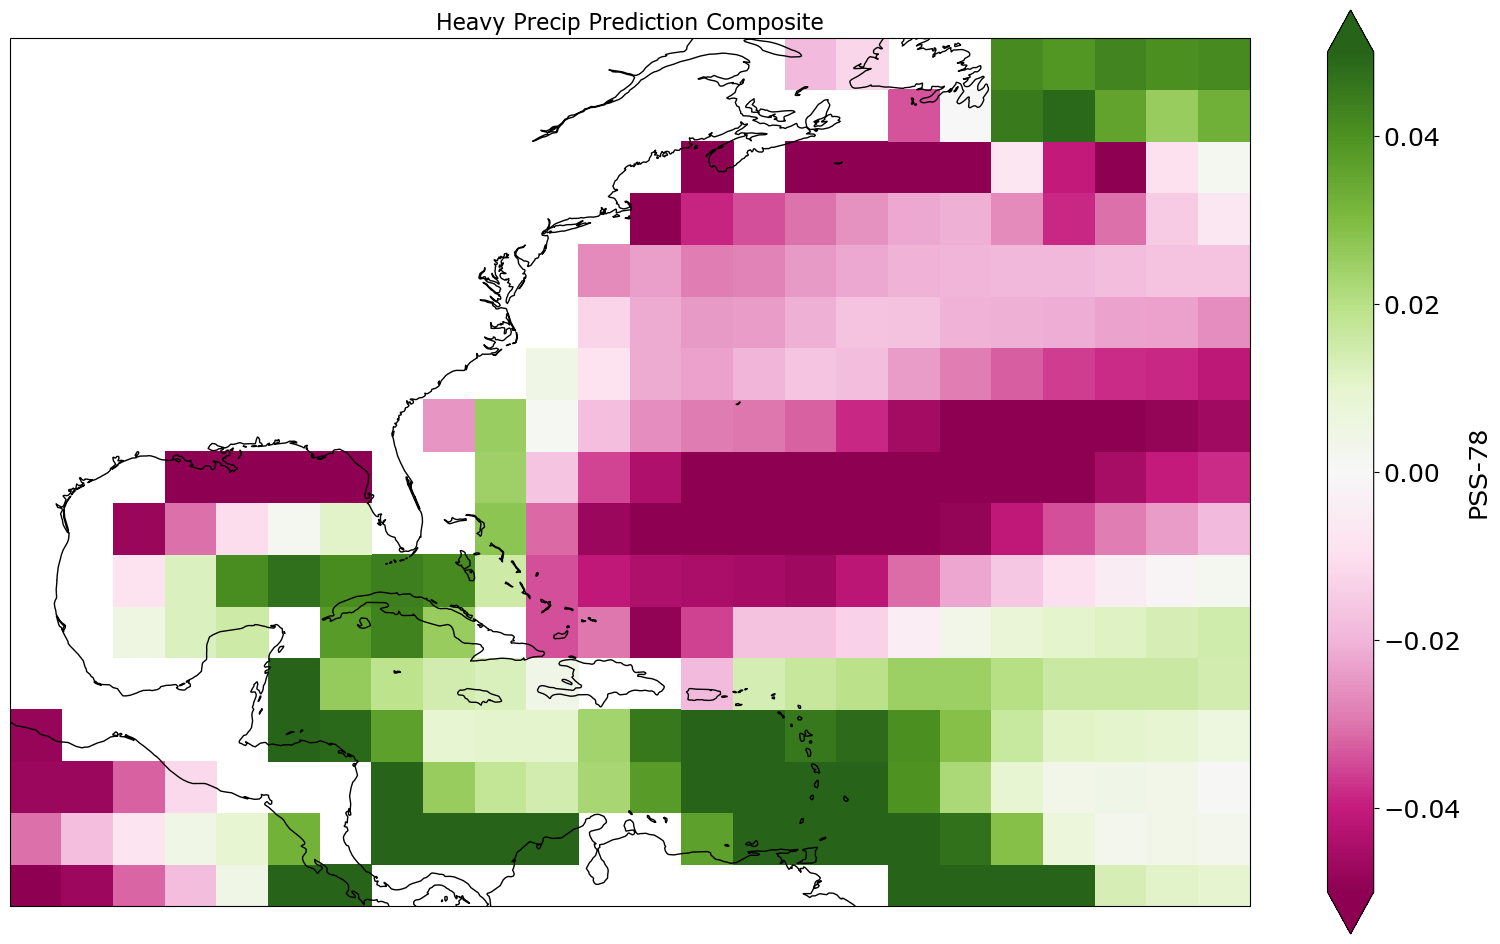

In [22]:
min_level = -0.05 
max_level = 0.05 
step_level = 0.001

fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(20, 12), subplot_kw={"projection": ccrs.PlateCarree(central_longitude=200)})

#Light Week 0
ax.set_title('Heavy Precip Prediction Composite' , fontsize = '16', fontweight = 'light')
#XAI_0_comp_lead0, cyclic_lons = add_cyclic_point(XAI_0_comp_lead0, coord=XAI_0_comp_leadall.lon)
cf = ax.pcolor(cyclic_lons,XAI_1_comp_leadall.lat,XAI_1_comp_leadall[0,:,:], transform = ccrs.PlateCarree(), cmap =cmap,vmin = min_level, vmax=max_level)
ax.add_feature(cfeature.COASTLINE)
ax.set_extent(extent,crs=ccrs.PlateCarree())
fig.colorbar(cf,ax=ax, label='PSS-78', extend='both')

In [23]:
file_plot, cyclic_lons = add_cyclic_point(file_plot, coord=file_plot.lon)


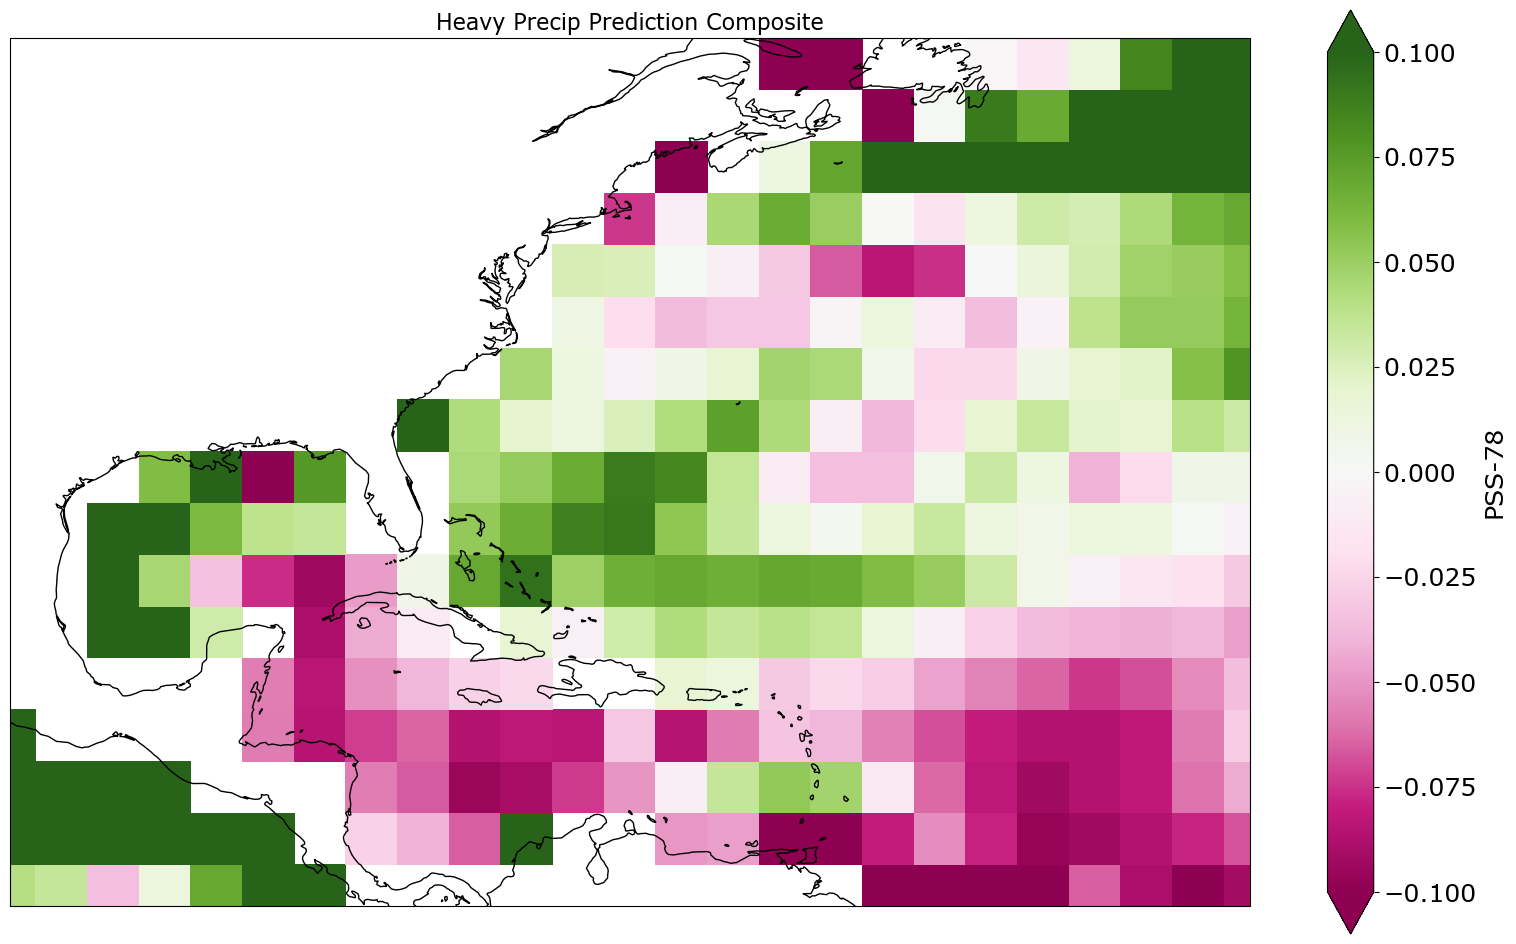

In [24]:
min_level = -0.1 
max_level = 0.1 
step_level = 0.001

fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(20, 12), subplot_kw={"projection": ccrs.PlateCarree(central_longitude=200)})

#Light Week 0
ax.set_title('Heavy Precip Prediction Composite' , fontsize = '16', fontweight = 'light')
#XAI_0_comp_lead0, cyclic_lons = add_cyclic_point(XAI_0_comp_lead0, coord=XAI_0_comp_leadall.lon)
cf = ax.pcolor(cyclic_lons,file_readin.lat,file_plot, transform = ccrs.PlateCarree(), cmap =cmap,vmin = min_level, vmax=max_level)
ax.add_feature(cfeature.COASTLINE)
ax.set_extent(extent,crs=ccrs.PlateCarree())
fig.colorbar(cf,ax=ax, label='PSS-78', extend='both')